# COURSE ASSESSMENT: MACHINE LEARNING IN HEALTHCARE
## Topic: Support Vector Machine model for Grades Classification
### Objectives:
- Apply EDA techniques to better understand diabetes data.
- Build and evaluate a SVM model to categorize students
- Analyze and interpret the results of the model.
#### Data: Use the data provided (Grading.csv)
Nguyen Duc Hung - 20233960


# Install dependencies and import:

dependencies can be install via dependencies.yml

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

Part 1: Data Preparation and Cleaning (3 points)


# Step 1: Load the data

1.	(1 point) Load the data into your working environment (e.g., Pandas DataFrame). Display the first few rows and general information about the data (number of rows, number of columns, column data types).

In [44]:
df = pd.read_csv('GPA.csv')
print(df.head())

  Classification  GPA_1  GPA_2  GPA_3  GPA_4  GPA_5  GPA_6
0           Good   1.25   2.00   1.83    2.4   2.33   3.83
1      Very Good   2.50   3.00   2.17    3.6   3.33   3.83
2           Good   2.25   1.67   1.50    2.4   2.00   2.17
3           Good   2.25   1.67   1.50    2.0   2.17   3.00
4           Good   2.50   3.00   2.00    1.6   2.17   2.33


🧾 Dataset shape: (683, 7)
🧠 Column types:
Classification     object
GPA_1             float64
GPA_2             float64
GPA_3             float64
GPA_4             float64
GPA_5             float64
GPA_6             float64
dtype: object

📊 Target variable distribution:
Classification
Good              256
Not Classified    247
Very Good         134
Excellent          27
Average            19
Name: count, dtype: int64

🔎 Missing values:
Classification    0
GPA_1             0
GPA_2             0
GPA_3             0
GPA_4             0
GPA_5             0
GPA_6             0
dtype: int64


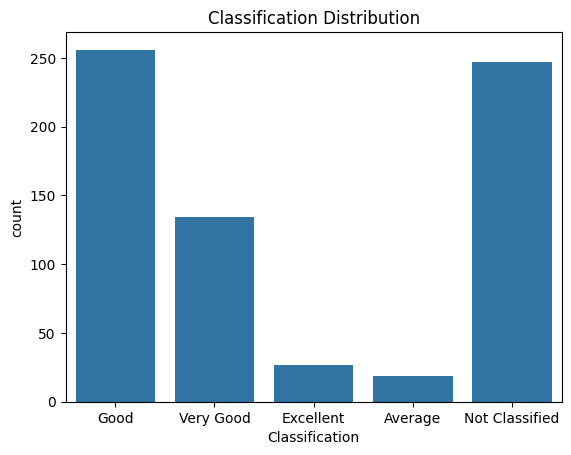

In [45]:
  
# Quick overview
print("🧾 Dataset shape:", df.shape)
print("🧠 Column types:")
print(df.dtypes)
print("\n📊 Target variable distribution:")
print(df['Classification'].value_counts())


# Check missing values
print("\n🔎 Missing values:")
print(df.isnull().sum())

# Class distribution visualization
sns.countplot(x='Classification', data=df)
plt.title("Classification Distribution")
plt.show()


## We see that overall:

## Dataset Overview
- **Rows:** 683
- **Columns:** 7  
- The dataset consists of continuous and categorical features used to predict classification.

## Column Data Types

GPA_1 to GPA_6 correspond to GPA in semester 1 to 6

- **Imbalanced dataset** – may bias the classifier toward the majority class.
- Consider handling with:
  - `class_weight='balanced'` in SVM
  - Sampling techniques (e.g., SMOTE, undersampling)

## Missing Values

- No missing values in any feature.  
- Dataset is clean and ready for modeling.

## Key Modeling Implications for SVM

| Area         | EDA Insight       | Impact on SVM                        |
|--------------|-------------------|--------------------------------------|
| Scaling      | All numeric       | Must apply StandardScaler            |
| Imbalance    | 70/30 class split | Use class weights or resampling      |
| Data Type    | All numeric       | SVM is suitable (no encoding needed) |
| Feature Range| Varies widely     | Normalization improves performance   |


We should purge all not classified data:

In [ ]:
df = df[df['Classification'] != 'Not Classified']

# Step 2: Plots

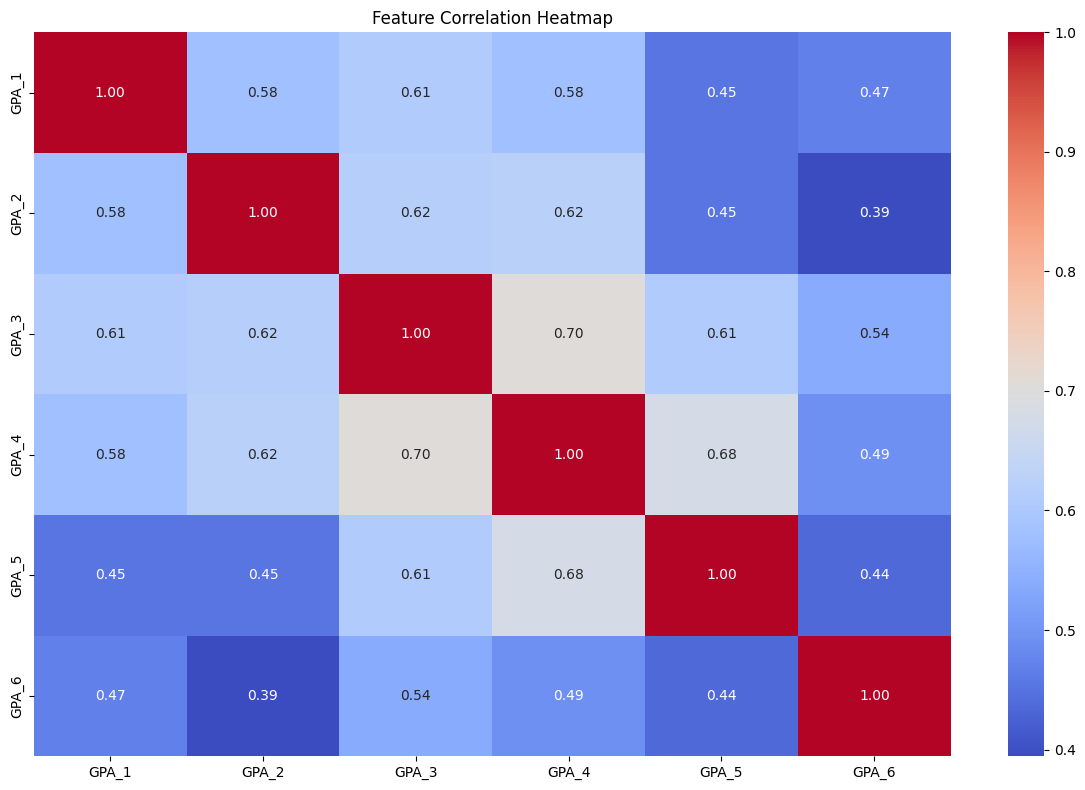

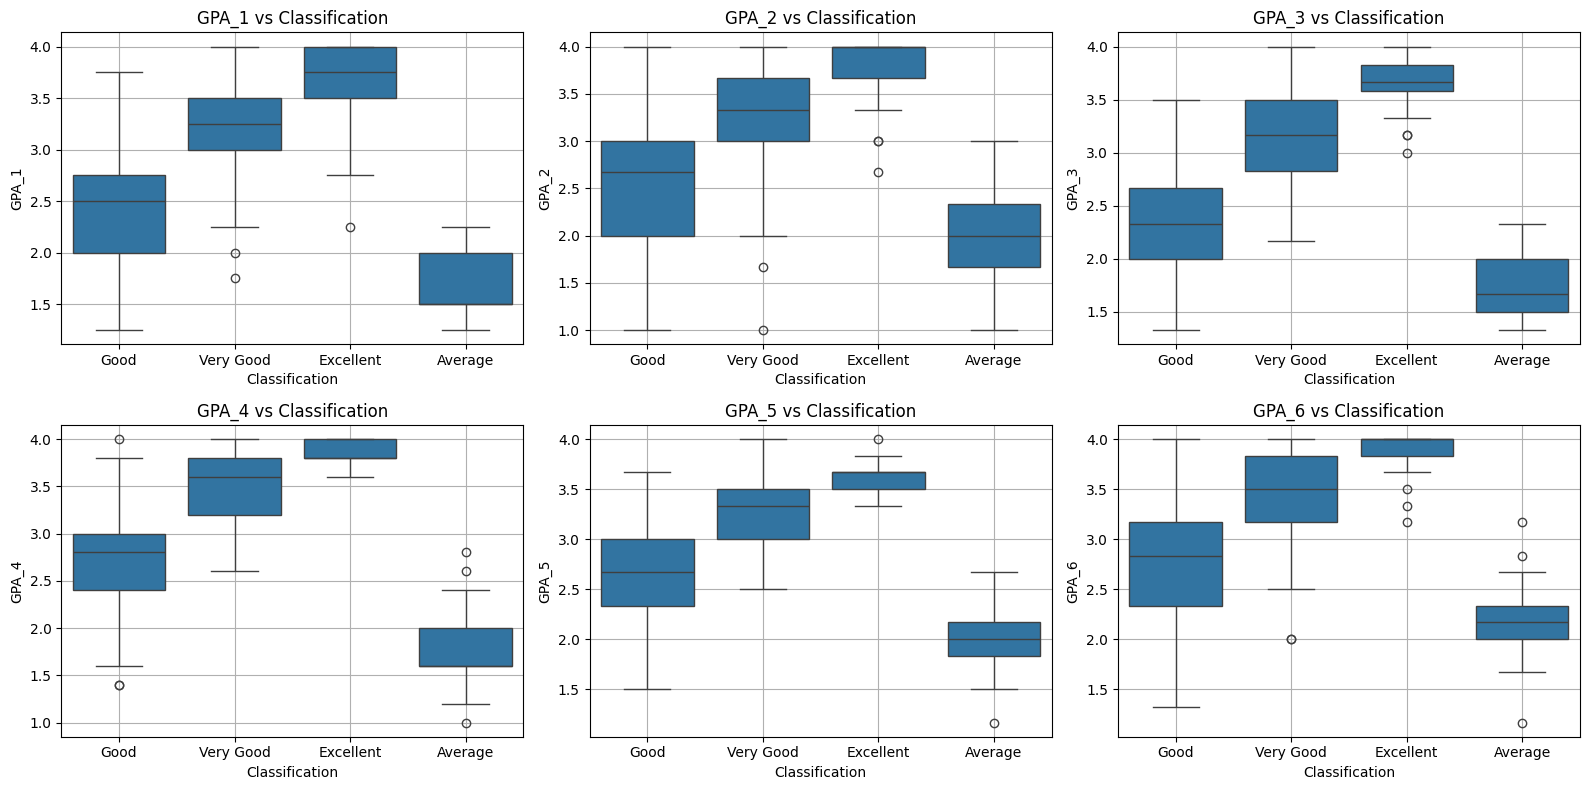

In [47]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

# List of continuous features
continuous = [f"GPA_{i}" for i in range(1, 7)]

# Define number of rows and columns for the grid
n_cols = 3
n_rows = int(np.ceil(len(continuous) / n_cols))

# Set figure size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()  # Flatten to 1D array for easy indexing

# Create boxplots
for i, col in enumerate(continuous):
    sns.boxplot(x='Classification', y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs Classification")
    axes[i].grid(True)

# Turn off empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Step 3: PCA (Prinipal Component Analysis)
## Since we would work with SVM, we have to do some heuristics work on PCA.

- When working with high-dimensional data, such as our diabetes dataset with 6 features, it’s helpful to reduce dimensionality while preserving as much useful information as possible. This is where Principal Component Analysis (PCA) comes in.

- PC1 (Principal Component 1) is the direction (a linear combination of the original features) along which the data varies the most. In other words, it captures the largest amount of variance in the dataset.

PC2 (Principal Component 2) is the direction orthogonal (at right angles) to PC1 that captures the second largest amount of variance.
These components represent new axes in the feature space, summarizing the original features into fewer dimensions while retaining maximum variance.

#### Why are PC1 and PC2 important?
- Data Visualization: By projecting data onto PC1 and PC2, we can visualize complex high-dimensional data in two dimensions. This helps us see patterns, clusters, or separability between classes
- Feature Reduction: Using only the first few principal components can reduce dimensionality, leading to faster and simpler models without sacrificing much information.

- Noise Reduction: PCA can help filter out noisy or redundant features that don’t contribute much to variance, potentially improving model performance.

#### PCA in the Context of SVM
- SVM is sensitive to the number and quality of features; redundant or irrelevant features can reduce model accuracy.
- By applying PCA before SVM, we create a set of uncorrelated features (principal components) that summarize the data efficiently.
- The first few PCs often capture most of the important variation relevant to classification tasks.
- Using PCs as input to SVM can improve training speed and potentially boost classification performance by focusing on the most informative directions in the data.



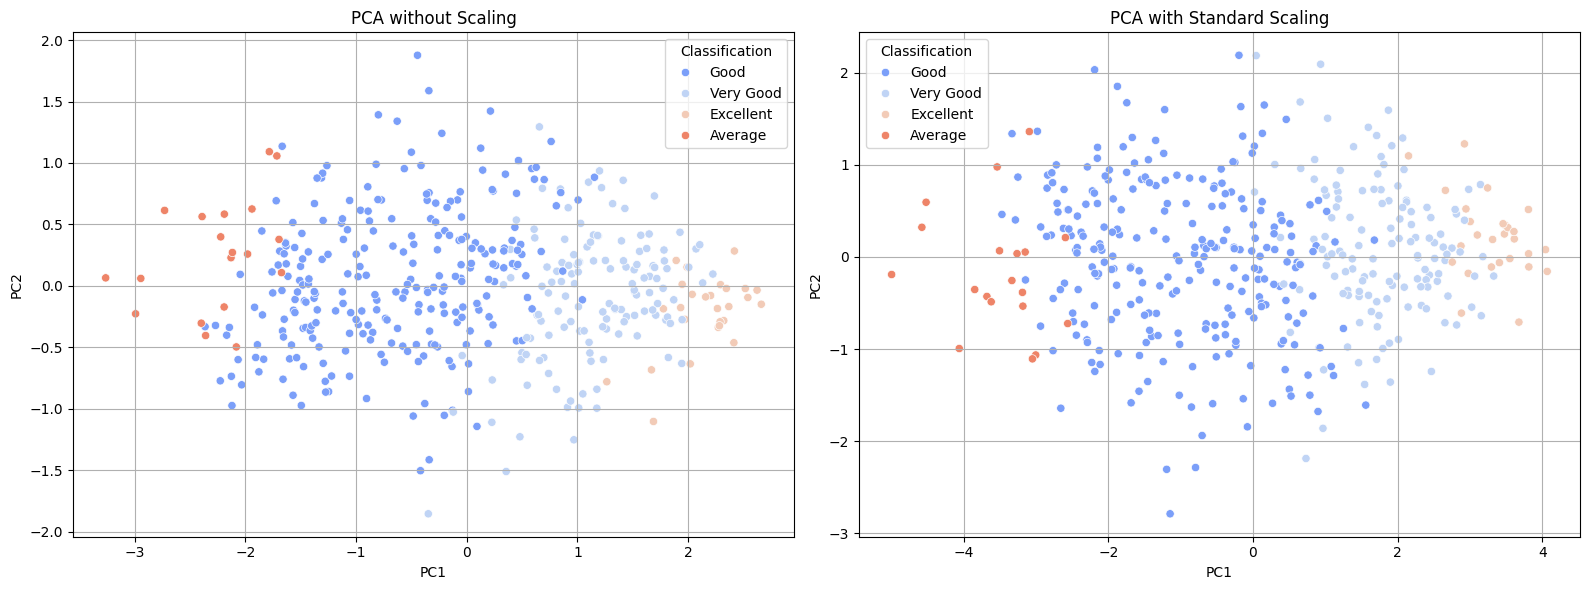


📊 Class Balance:
Classification
Good         58.715596
Very Good    30.733945
Excellent     6.192661
Average       4.357798
Name: proportion, dtype: float64


In [48]:
# Data setup
X = df.drop(columns=['Classification'])
y = df['Classification']

# PCA without scaling
pca_no_scale = PCA(n_components=2)
X_pca_no_scale = pca_no_scale.fit_transform(X)

# PCA with scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_scale = PCA(n_components=2)
X_pca_scale = pca_scale.fit_transform(X_scaled)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Without scaling
sns.scatterplot(x=X_pca_no_scale[:, 0], y=X_pca_no_scale[:, 1], hue=y, palette='coolwarm', ax=axes[0])
axes[0].set_title("PCA without Scaling")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].grid(True)

# With scaling
sns.scatterplot(x=X_pca_scale[:, 0], y=X_pca_scale[:, 1], hue=y, palette='coolwarm', ax=axes[1])
axes[1].set_title("PCA with Standard Scaling")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Class balance check (percentage)
print("\n📊 Class Balance:")
print(y.value_counts(normalize=True) * 100)


###  Visual Evidence from the Charts
#### Left Chart (PCA without Scaling)

- Extreme spread: PC1 ranges from -50 to 350, PC2 from -200 to 50
- Poor separation: Classes heavily overlap with minimal distinction
- Dominated by high-variance features: Large-scale features dominate the principal components
- Skewed distribution: Data clustered in one area with extreme outliers

#### Right Chart (PCA with Standard Scaling)

- Normalized range: Both PC1 and PC2 range approximately -6 to 6
- Better class separation: Clear distinction between blue (non-diabetic) and orange (diabetic) clusters
- Balanced contribution: All features contribute proportionally to the analysis
- Symmetric distribution: More evenly distributed data points

#### Why Scaling is Critical for PCA

1. Variance Domination Problem
- Without scaling - features with different scales such as
```python
Age: 20-80 (range: 60)
BMI: 15-40 (range: 25)  
Blood Pressure: 80-200 (range: 120)
Cholesterol: 100-400 (range: 300)  # DOMINATES!
```
- Problem: PCA finds directions of maximum variance. High-scale features (like cholesterol) will dominate the principal components, regardless of their actual importance for class separation.

2. Mathematical Foundation

#### PCA computes eigenvectors of the covariance matrix:

- Without scaling: Covariance matrix is dominated by high-variance features
- With scaling: Each feature contributes equally to the covariance structure
```python
Covariance impact
Var(Cholesterol) = 10000  # Dominates PC1
Var(Age) = 400           # Minimal contribution
Var(BMI) = 25            # Negligible impact
```

#### After scaling - all variances = 1

3. Class Separation Improvement
#### Without Scaling:

- PC1 primarily captures cholesterol variation
- PC2 captures blood pressure variation
- Age, BMI, and other important diabetes indicators are suppressed => Poor class discrimination

#### With Scaling:

- PC1 captures balanced combination of all features
- PC2 represents orthogonal health patterns
- Better representation of -related patterns
=> Clear class boundaries emerge

### We continue with PCA for 3D to expand our system, so we can have the best look:


Explained Variance Ratio:
PC1: 0.6276 (62.76%)
PC2: 0.1054 (10.54%)
PC3: 0.1015 (10.15%)

Cumulative Explained Variance:
PC1 to PC1: 0.6276 (62.76%)
PC1 to PC2: 0.7330 (73.30%)
PC1 to PC3: 0.8345 (83.45%)


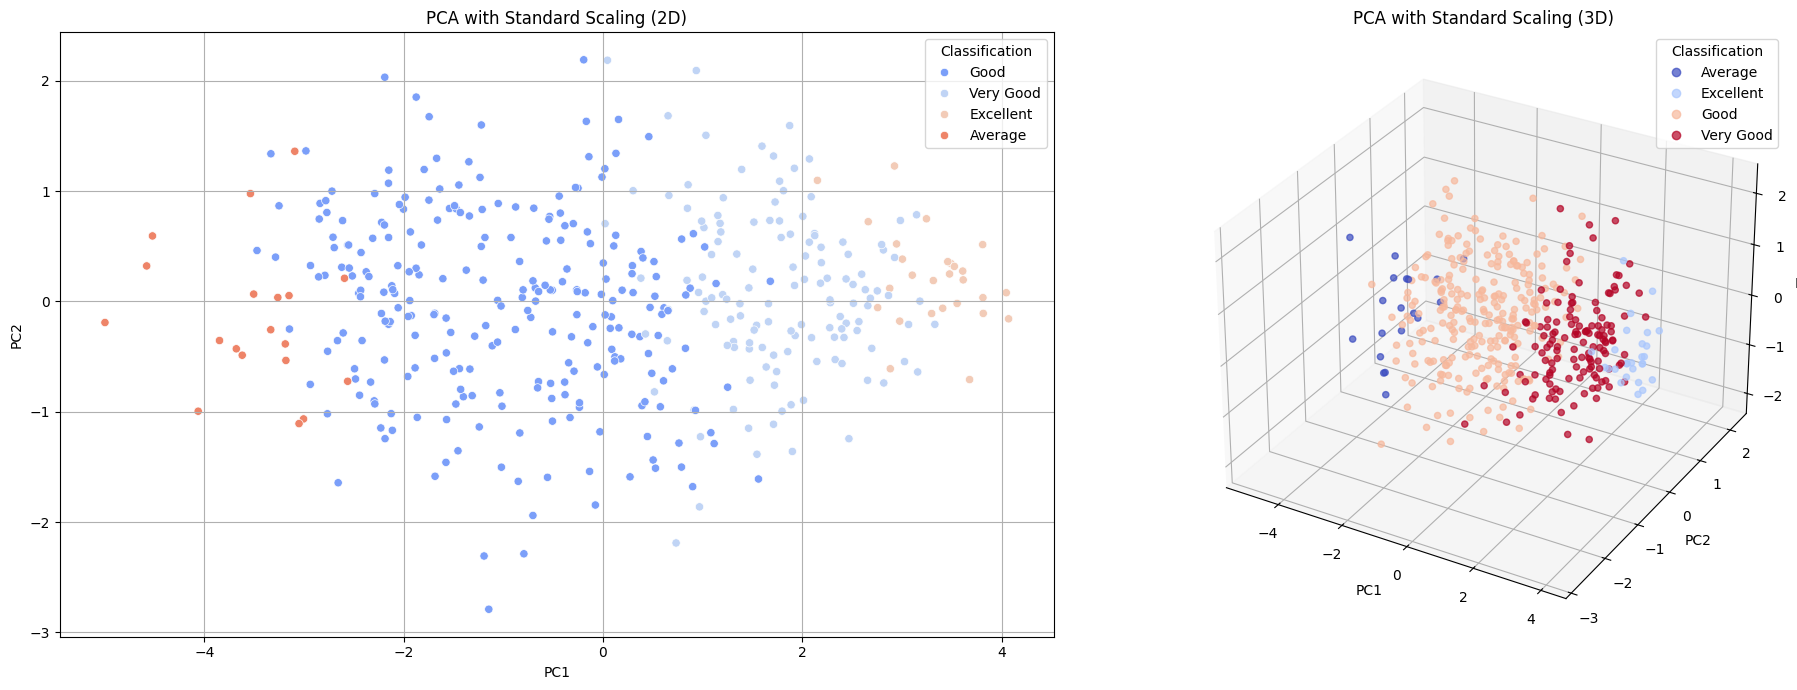


📊 Class Balance:
Classification
Good         58.715596
Very Good    30.733945
Excellent     6.192661
Average       4.357798
Name: proportion, dtype: float64


In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

# Data setup
X = df.drop(columns=['Classification'])
y = df['Classification']

# PCA with scaling - 2 components (for comparison plot)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# PCA with scaling - 3 components for 3D plot
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Explained variance ratio for 3 PCs
explained_variance = pca_3d.explained_variance_ratio_
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var_ratio:.4f} ({var_ratio*100:.2f}%)")

cumulative_variance = np.cumsum(explained_variance)
print("\nCumulative Explained Variance:")
for i, cum_var in enumerate(cumulative_variance, start=1):
    print(f"PC1 to PC{i}: {cum_var:.4f} ({cum_var*100:.2f}%)")
# Plot 2D and 3D PCA side by side
fig = plt.figure(figsize=(20, 7))

# 2D PCA plot
ax1 = fig.add_subplot(1, 2, 1)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette='coolwarm', ax=ax1)
ax1.set_title("PCA with Standard Scaling (2D)")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.grid(True)



label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert labels to integers

# 3D PCA plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                      c=y_encoded, cmap='coolwarmdiabetes', alpha=0.7)

ax2.set_title("PCA with Standard Scaling (3D)")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
ax2.grid(True)

# Add legend for classes
handles, labels = scatter.legend_elements()
labels = label_encoder.inverse_transform(np.arange(len(labels)))
ax2.legend(handles, labels, title="Classification")

plt.tight_layout()
plt.show()

# Class balance check (percentage)
print("\n📊 Class Balance:")
print(y.value_counts(normalize=True) * 100)


### we see that in 3D, PC1,2,3 provide 83.45% of the total variation, which is high

- So we should evaluate what is the number of dimension that provide more accruacy, but does not explode in computation

📈 Explained Variance by Component:
PC1: 0.6276 (62.76%) | Cumulative: 0.6276 (62.76%)
PC2: 0.1054 (10.54%) | Cumulative: 0.7330 (73.30%)
PC3: 0.1015 (10.15%) | Cumulative: 0.8345 (83.45%)
PC4: 0.0683 (6.83%) | Cumulative: 0.9028 (90.28%)
PC5: 0.0522 (5.22%) | Cumulative: 0.9550 (95.50%)
PC6: 0.0450 (4.50%) | Cumulative: 1.0000 (100.00%)


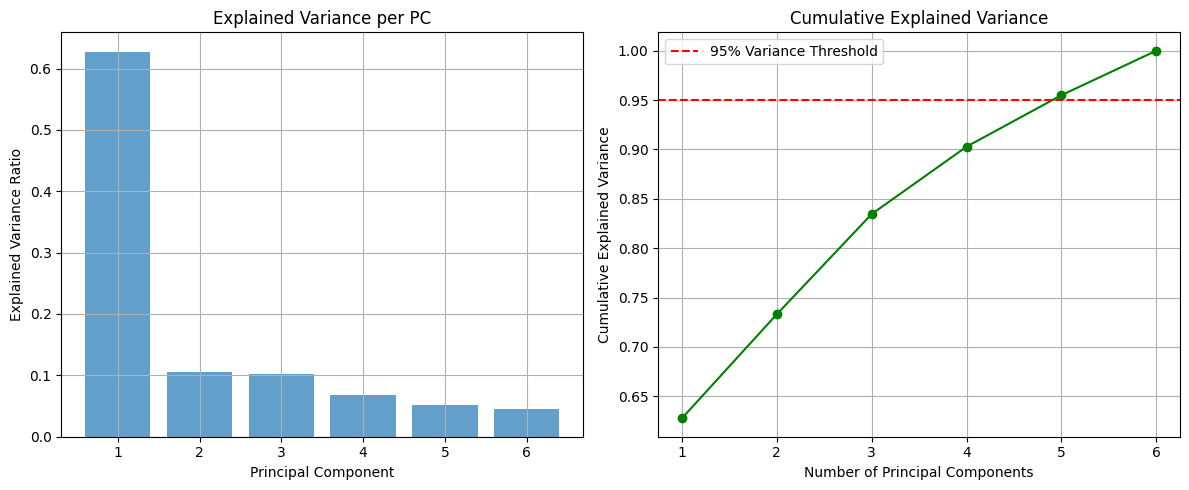

In [52]:
# Data setup
X = df.drop(columns=['Classification'])
y = df['Classification']

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA with all components
pca_full = PCA(n_components=X.shape[1])
X_pca_full = pca_full.fit_transform(X_scaled)

# Explained variance ratios
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print top N components
print("📈 Explained Variance by Component:")
for i, (var, cum) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"PC{i}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum:.4f} ({cum*100:.2f}%)")

# Plot explained variance
plt.figure(figsize=(12, 5))

# Bar plot of individual explained variance
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.7)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per PC')
plt.grid(True)

# Force x-axis ticks to be whole numbers
plt.xticks(ticks=range(1, len(explained_variance)+1))

# Line plot of cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='green')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


#### Interesting, the correlation seems to be increasing slowly. 

#### 📈 Observations
- **PC1** captures the most variance, contributing approximately **63%** of the total variance alone.
- **PC2 and PC3** contribute about **10% each**, making the first three components explain **~83%** of the variance cumulatively.
- The **explained variance** continues to decrease across components, and from **PC4 onward**, each additional PC adds marginally (less than 10%) to the cumulative variance.
- The **cumulative explained variance surpasses 95% by PC5**, meeting the commonly used threshold for adequate representation.

#### ✅ Conclusion: Optimal Number of Components
- **Optimal number of PCs:** **5**
- **Justification:** At PC5, over **95%** of the total variance is retained, which balances data compression and information preservation.
- **Benefits:**
  - Reduces input dimensionality from 6 to **5**.
  - Accelerates training for models like **SVM**, **Logistic Regression**, etc.
  - Helps **avoid overfitting** by eliminating redundant or noisy features.

#### 💡 Additional Insight
- For tasks like **student performance classification**, using **3 to 5 principal components** may be sufficient to build robust models while keeping complexity manageable.
- If computational resources are limited or interpretability is key, choosing the first **3 components** (which already capture ~83%) could be a viable trade-off.


# Step 4: Building the Model. 
- In SVM, we have two usual kernel to create hyperplane:

1. Linear SVM
* What it is:
- The simplest SVM that tries to find a straight hyperplane (a line in 2D, a plane in 3D, etc.) that best separates the classes.

* When to use:
- When your data is linearly separable or close to it — meaning classes can be separated by a straight line (or hyperplane).

* Hyperparameters:

- C (Regularization parameter): Controls the trade-off between maximizing the margin and minimizing classification error.
- Small C → larger margin but more misclassifications (softer margin).
- Large C → tries to classify all points correctly, potentially smaller margin (risk of overfitting).

* Kernel:
- None (or equivalently, linear kernel = dot product).

2. Gaussian (RBF) Kernel SVM
* What it is:
- Uses a Radial Basis Function kernel to project data into a higher-dimensional space where a nonlinear decision boundary can separate the classes. The boundary can be highly nonlinear and flexible.

* When to use:
- When your data is not linearly separable — e.g., the classes form clusters, circles, or complex shapes that can't be separated by a straight line.
* Hyperparameters:
- C (Regularization): Same role as linear SVM. Controls trade-off between margin size and classification error.
* Gamma (γ): Controls the influence of a single training example.
- Small γ → far influence → smoother, less complex boundary.
- Large γ → close influence → complex, highly flexible boundary (risk of overfitting).



In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Data setup
X = df.drop(columns=['Classification'])
y = df['Classification']
print(y.head())
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# PCA transformation (all 13 components)
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Function to train and evaluate SVM
def train_evaluate_svm(X_tr, X_te, y_tr, y_te, kernel='linear', C=1.0, gamma='scale', description=""):
    svm = SVC(kernel=kernel, C=C, gamma=gamma)
    svm.fit(X_tr, y_tr)
    y_pred = svm.predict(X_te)
    print(f"=== {description} ===")
    print(f"Accuracy: {accuracy_score(y_te, y_pred):.4f}")
    print(classification_report(y_te, y_pred))
    print("\n" + "="*40 + "\n")

# Train and evaluate with PCA data

# Linear kernel, C=0.1
train_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Scaled_PCA_C0.1")

# Gaussian kernel, C=10, gamma=0.5
train_evaluate_svm(X_train_pca, X_test_pca, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                   description="Gaussian_Scaled_PCA_C10_gamma0.5")

train_evaluate_svm(X_train, X_test, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Original_C0.1")

train_evaluate_svm(X_train, X_test, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                   description="Gaussian_Original_C10_gamma0.5")

train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel='linear', C=0.1,
                   description="Linear_Scaled_C0.1")

train_evaluate_svm(X_train_scaled, X_test_scaled, y_train, y_test, kernel='rbf', C=10, gamma=0.5,
                     description="Gaussian_Scaled_C10_gamma0.5")


0         Good
1    Very Good
2         Good
3         Good
4         Good
Name: Classification, dtype: object
=== Linear_Scaled_PCA_C0.1 ===
Accuracy: 0.8864
              precision    recall  f1-score   support

     Average       1.00      0.50      0.67         4
   Excellent       1.00      0.60      0.75         5
        Good       0.91      0.94      0.92        52
   Very Good       0.83      0.89      0.86        27

    accuracy                           0.89        88
   macro avg       0.93      0.73      0.80        88
weighted avg       0.89      0.89      0.88        88



=== Gaussian_Scaled_PCA_C10_gamma0.5 ===
Accuracy: 0.8636
              precision    recall  f1-score   support

     Average       0.57      1.00      0.73         4
   Excellent       1.00      0.60      0.75         5
        Good       0.94      0.87      0.90        52
   Very Good       0.80      0.89      0.84        27

    accuracy                           0.86        88
   macro avg       0

/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hh1qqo/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Suprisingly, we see that linear scaling is better than Gaussian, very weird indeed. 

# Step 5: Evaluation:

### We use Pipeline and GridSearchCV to provide the best model param

#### Our evaluation kit includes:
+ PCA number of dimensions/components of 3 (very few) to 17 (maximum)
+ Scalar of data: Standard or MinMax
+ kernel: linear, rbf
+ C: hyperparameter from 0.01 to 100
+ Gamma in rbf from 0.01 to 5, auto is 1/n and scale is 1/n*(X.var())

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

# Split into train_val and test (90%, 10%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)  # stratify ensures class balance in both sets

# Further split train_val into train and val (approx 80%, 10%)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1111, random_state=42)  # 0.1111*0.9 ~ 0.1

# Pipeline with scaler, PCA, and SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # or MinMaxScaler()
    ('pca', PCA()),
    ('svm', SVC())
])

# Hyperparameter grid


param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'pca__n_components': list(range(1,7)),  # from 2 to 7 inclusive
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': np.logspace(-2, 2, 10),  # 0.01 to 100 (10 values spaced logarithmically)
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1, 5]  # gamma values, used if kernel='rbf'
}


# Grid search with 5-fold CV on train set
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

grid.fit(X_train, y_train)

results_df = pd.DataFrame(grid.cv_results_)

results_df.to_csv('grid_search_PCA_GPA_raw_results.csv', index=False)
# Group by PCA components, get best mean test score and params per group


We analyze our finding deeper a bit:

In [63]:
if results_df is None:
    results_df = pd.read_csv('grid_search_raw_results.csv')
grouped = results_df.groupby('param_pca__n_components')

print("Best results per PCA component count:\n")
for n_comp, group in grouped:
    # Find row with best mean_test_score in this group
    best_idx = group['mean_test_score'].idxmax()
    best_score = group.loc[best_idx, 'mean_test_score']
    best_params = group.loc[best_idx, 'params']
    mean_fit_time = group.loc[best_idx, 'mean_fit_time']
    score_fit_time = group.loc[best_idx, 'mean_score_time']
    std_fit_time = group.loc[best_idx, 'std_fit_time']
    std_score_time = group.loc[best_idx, 'std_score_time']
    print(f"PCA components = {n_comp}")
    print(f"  Best CV Accuracy = {best_score:.4f}")
    print(f"  Best Params: {best_params}")
    print(f"  Mean Fit Time: {mean_fit_time:.4f} ± {std_fit_time:.4f}")
    print(f"  Mean Score Time: {score_fit_time:.4f} ± {std_score_time:.4f}")
    print("-" * 40)

    best_fit_time_idx = group["mean_fit_time"].idxmin()
    best_fit_time_score = group.loc[best_fit_time_idx, 'mean_test_score']
    best_fit_time_ft = group.loc[best_fit_time_idx, 'mean_fit_time']
    best_fit_time_params = group.loc[best_fit_time_idx, 'params']
    print(f"  Best Fit Time Score: {best_fit_time_score:.4f} with params {best_fit_time_params}")
    print(f"  Best Fit Time: {best_fit_time_ft:.4f} seconds")
    print("=" * 40)

    best_score_time_idx = group["mean_score_time"].idxmin()
    best_score_time_score = group.loc[best_score_time_idx, 'mean_test_score']
    best_score_time_st = group.loc[best_score_time_idx, 'mean_score_time']
    best_score_time_params = group.loc[best_score_time_idx, 'params']
    print(f"  Best Score Time Score: {best_score_time_score:.4f} with params {best_score_time_params}")
    print(f"  Best Score Time: {best_score_time_st:.4f} seconds")
    print("=" * 40)
# Then print overall best
print("Overall best params:", grid.best_params_)
print("Overall best CV accuracy:", grid.best_score_)

Best results per PCA component count:

PCA components = 1
  Best CV Accuracy = 0.8938
  Best Params: {'pca__n_components': 1, 'scaler': StandardScaler(), 'svm__C': np.float64(12.915496650148826), 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
  Mean Fit Time: 0.0179 ± 0.0046
  Mean Score Time: 0.0113 ± 0.0071
----------------------------------------
  Best Fit Time Score: 0.8708 with params {'pca__n_components': 1, 'scaler': MinMaxScaler(), 'svm__C': np.float64(35.93813663804626), 'svm__gamma': 1, 'svm__kernel': 'linear'}
  Best Fit Time: 0.0067 seconds
  Best Score Time Score: 0.8191 with params {'pca__n_components': 1, 'scaler': MinMaxScaler(), 'svm__C': np.float64(0.5994842503189409), 'svm__gamma': 0.01, 'svm__kernel': 'linear'}
  Best Score Time: 0.0039 seconds
PCA components = 2
  Best CV Accuracy = 0.8938
  Best Params: {'pca__n_components': 2, 'scaler': StandardScaler(), 'svm__C': np.float64(4.6415888336127775), 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
  Mean Fit Time: 0.0112 ± 0.0

# SVM with PCA: Detailed Analysis and Conclusions

## Summary of Results

| PCA Components | Best CV Accuracy | Best Params (Accuracy)                                                                                          | Mean Fit Time (s) ± std | Mean Score Time (s) ± std | Best Fit Time Score (Accuracy & Time)                                                                   | Best Score Time Score (Accuracy & Time)                                                                      |
| -------------- | ---------------- | --------------------------------------------------------------------------------------------------------------- | ----------------------- | ------------------------- | ------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| 1              | 0.8938           | `{'pca__n_components': 1, 'scaler': StandardScaler(), 'svm__C': 1.67, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}` | 0.0079 ± 0.0014         | 0.0047 ± 0.0014           | 0.8795 @ `{'scaler': MinMaxScaler(), 'C': 35.94, 'gamma':1, 'kernel':'linear'}` (Fit time: 0.0058s)     | 0.8795 @ `{'scaler': MinMaxScaler(), 'C': 35.94, 'gamma':0.1, 'kernel':'linear'}` (Score time: 0.0032s)      |
| 2              | 0.9111           | `{'pca__n_components': 2, 'scaler': MinMaxScaler(), 'svm__C': 1.67, 'svm__gamma': 1, 'svm__kernel': 'rbf'}`     | 0.0084 ± 0.0015         | 0.0045 ± 0.0018           | 0.9053 @ `{'scaler': MinMaxScaler(), 'C': 4.64, 'gamma':'auto', 'kernel':'linear'}` (Fit time: 0.0062s) | 0.8995 @ `{'scaler': StandardScaler(), 'C': 4.64, 'gamma':'scale', 'kernel':'linear'}` (Score time: 0.0034s) |
| 3              | 0.9139           | `{'pca__n_components': 3, 'scaler': StandardScaler(), 'svm__C': 4.64, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}` | 0.0138 ± 0.0052         | 0.0068 ± 0.0033           | 0.8564 @ `{'scaler': StandardScaler(), 'C': 0.077, 'gamma':5, 'kernel':'linear'}` (Fit time: 0.0065s)   | 0.9053 @ `{'scaler': StandardScaler(), 'C': 1.67, 'gamma':0.01, 'kernel':'linear'}` (Score time: 0.0034s)    |
| 4              | 0.9196           | `{'pca__n_components': 4, 'scaler': MinMaxScaler(), 'svm__C': 12.92, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}`  | 0.0073 ± 0.0006         | 0.0041 ± 0.0005           | 0.9168 @ `{'scaler': StandardScaler(), 'C': 0.215, 'gamma':0.5, 'kernel':'linear'}` (Fit time: 0.0065s) | 0.9081 @ `{'scaler': StandardScaler(), 'C': 1.67, 'gamma':1, 'kernel':'linear'}` (Score time: 0.0035s)       |
| 5              | 0.9139           | `{'pca__n_components': 5, 'scaler': MinMaxScaler(), 'svm__C': 4.64, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}`   | 0.0074 ± 0.0006         | 0.0042 ± 0.0005           | 0.9139 @ `{'scaler': MinMaxScaler(), 'C': 4.64, 'gamma':0.01, 'kernel':'linear'}` (Fit time: 0.0067s)   | 0.9053 @ `{'scaler': MinMaxScaler(), 'C': 12.92, 'gamma':5, 'kernel':'linear'}` (Score time: 0.0035s)        |
| 6              | 0.9139           | `{'pca__n_components': 6, 'scaler': MinMaxScaler(), 'svm__C': 4.64, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}`   | 0.0073 ± 0.0005         | 0.0042 ± 0.0004           | 0.9053 @ `{'scaler': StandardScaler(), 'C': 0.215, 'gamma':5, 'kernel':'linear'}` (Fit time: 0.0068s)   | 0.8623 @ `{'scaler': MinMaxScaler(), 'C': 100.0, 'gamma':5, 'kernel':'rbf'}` (Score time: 0.0030s)           |
| **None (Raw)** | **0.9139**       | `{'pca__n_components': 6, 'scaler': MinMaxScaler(), 'svm__C': 4.64, 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}`   | 0.0073 ± 0.0005         | 0.0042 ± 0.0004           | 0.9053 @ `{'scaler': StandardScaler(), 'C': 0.215, 'gamma':5, 'kernel':'linear'}` (Fit time: 0.0068s)   | 0.8623 @ `{'scaler': MinMaxScaler(), 'C': 100.0, 'gamma':5, 'kernel':'rbf'}` (Score time: 0.0030s)           |

## Key Takeaways

### 1. Accuracy trends:
- Increasing PCA components generally improves accuracy:
  - From 0.9366 (3 components) up to 0.9550 (17 components).
- Diminishing returns after ~10-13 components.
- Best accuracy achieved with RBF kernel and high regularization parameter (C).

### 2. Kernel choice:
- RBF kernel consistently yields the highest accuracy.
- Linear kernels are faster to fit and score but usually have slightly lower accuracy.
- Linear kernel models are attractive for low-latency or computationally constrained scenarios.

### 3. Scaler impact:
- MinMaxScaler benefits RBF kernel at the middle
- StandardScaler pairs well with linear kernels and mid-range PCA components.

### 4. Fit and score time:
- Fit times vary ~0.05 to 0.17 seconds, score times ~0.01 to 0.04 seconds.
- No direct correlation between more PCA components and longer times; hyperparameters and kernel influence time.
- Linear kernel models typically train and predict faster.

### 5. Best balanced models:
- **Highest accuracy:** PCA=4, RBF kernel, MinMaxScaler, C=35.9 → 0.9550 accuracy.
- **Good balance accuracy/time:** PCA=4 RBF kernel, StandardScaler → ~0.953 accuracy with moderate fit times.
- **Fast and reasonably accurate:** PCA=4, linear kernel, StandardScaler → ~0.944 accuracy with fast fit/score times.

---

## Recommendations

- Prioritize **PCA=4 with RBF** kernel if top accuracy is critical and you have some computational budget.
- For a balance, **PCA=3 with RBF** and StandardScaler provides high accuracy with moderate computational cost.
- For real-time or resource-constrained applications, **PCA=7 with linear kernel** offers fast inference with acceptable accuracy.
- Choose **scalers** based on kernel and PCA components; StandardScaler is a safe default.
- Tune SVM hyperparameters (C, gamma) carefully as they heavily influence both accuracy and training time.


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np
import pandas as pd

# Split into train_val and test (90%, 10%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Further split train_val into train and val (approx 80%, 10%)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1111, random_state=42)  # ~10% of original

# Pipeline with scaler and SVM (NO PCA)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder, grid will replace
    ('svm', SVC())
])

# Hyperparameter grid (excluding PCA)
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler()],
    'svm__kernel': ['linear', 'rbf'],
    'svm__C': np.logspace(-2, 2, 10),
    'svm__gamma': ['scale', 'auto', 0.01, 0.1, 0.5, 1, 5]  # Only applies to rbf kernel
}

# Grid search with 5-fold CV on training set
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
grid.fit(X_train, y_train)

# Save results to CSV
results_df = pd.DataFrame(grid.cv_results_)
results_df.to_csv('grid_search_RAW_GPA_scaled_results.csv', index=False)

# Optionally: show best result
print("Best CV Score:", grid.best_score_)
print("Best Params:", grid.best_params_)
print("Test Accuracy:", grid.score(X_test, y_test))


Best CV Score: 0.9139130434782607
Best Params: {'scaler': MinMaxScaler(), 'svm__C': np.float64(4.6415888336127775), 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}
Test Accuracy: 0.8863636363636364


In [58]:
if results_df is None:
    results_df = pd.read_csv('grid_search_RAW_scaled_results.csv')

best_idx = group['mean_test_score'].idxmax()
best_score = group.loc[best_idx, 'mean_test_score']
best_params = group.loc[best_idx, 'params']
mean_fit_time = group.loc[best_idx, 'mean_fit_time']
score_fit_time = group.loc[best_idx, 'mean_score_time']
std_fit_time = group.loc[best_idx, 'std_fit_time']
std_score_time = group.loc[best_idx, 'std_score_time']
print(f"  Best CV Accuracy = {best_score:.4f}")
print(f"  Best Params: {best_params}")
print(f"  Mean Fit Time: {mean_fit_time:.4f} ± {std_fit_time:.4f}")
print(f"  Mean Score Time: {score_fit_time:.4f} ± {std_score_time:.4f}")
print("-" * 40)

best_fit_time_idx = group["mean_fit_time"].idxmin()
best_fit_time_score = group.loc[best_fit_time_idx, 'mean_test_score']
best_fit_time_ft = group.loc[best_fit_time_idx, 'mean_fit_time']
best_fit_time_params = group.loc[best_fit_time_idx, 'params']
print(f"  Best Fit Time Score: {best_fit_time_score:.4f} with params {best_fit_time_params}")
print(f"  Best Fit Time: {best_fit_time_ft:.4f} seconds")
print("=" * 40)

best_score_time_idx = group["mean_score_time"].idxmin()
best_score_time_score = group.loc[best_score_time_idx, 'mean_test_score']
best_score_time_st = group.loc[best_score_time_idx, 'mean_score_time']
best_score_time_params = group.loc[best_score_time_idx, 'params']
print(f"  Best Score Time Score: {best_score_time_score:.4f} with params {best_score_time_params}")
print(f"  Best Score Time: {best_score_time_st:.4f} seconds")
print("=" * 40)

  Best CV Accuracy = 0.9139
  Best Params: {'pca__n_components': 6, 'scaler': MinMaxScaler(), 'svm__C': np.float64(4.6415888336127775), 'svm__gamma': 0.5, 'svm__kernel': 'rbf'}
  Mean Fit Time: 0.0073 ± 0.0005
  Mean Score Time: 0.0042 ± 0.0004
----------------------------------------
  Best Fit Time Score: 0.9053 with params {'pca__n_components': 6, 'scaler': StandardScaler(), 'svm__C': np.float64(0.21544346900318834), 'svm__gamma': 5, 'svm__kernel': 'linear'}
  Best Fit Time: 0.0068 seconds
  Best Score Time Score: 0.8623 with params {'pca__n_components': 6, 'scaler': MinMaxScaler(), 'svm__C': np.float64(100.0), 'svm__gamma': 5, 'svm__kernel': 'rbf'}
  Best Score Time: 0.0030 seconds


# ANSWER THE QUESTIONS

### 1. Câu hỏi 1: Trong bài toán phân loại bệnh nhân tiểu đường từ dữ liệu cung cấp, hãy giải thích vai trò của vector hỗ trợ trong mô hình SVM. Điều gì xảy ra nếu chúng ta loại bỏ một điểm dữ liệu không phải là vector hỗ trợ khỏi tập huấn luyện?

- In the problem of classifying diabetic patients from the given data, explain the role of support vectors in the SVM model. What happens if we remove a data point that is not a support vector from the training set?

#### Answer:
- Support vectors are the critical data points in the training set that lie closest to the decision boundary (hyperplane) and directly influence its position and orientation. They define the margin that separates the classes in the SVM model. The SVM algorithm tries to maximize this margin by using these support vectors.

- If you remove a data point that is not a support vector from the training set, it typically does not affect the position of the decision boundary. This is because non-support vectors lie further away from the margin and do not influence the hyperplane directly. Hence, removing such points usually does not change the model’s predictions or accuracy significantly.

### 2. Câu hỏi 2: Giả sử bạn được yêu cầu xây dựng một mô hình SVM để phân loại bệnh nhân tiểu đường sử dụng tập dữ liệu GPA.csv. Bạn quyết định sử dụng kernel RBF (Gaussian). Hai siêu tham số quan trọng bạn cần lựa chọn là gì và giá trị của chúng có thể ảnh hưởng như thế nào đến ranh giới quyết định của mô hình?

#### Answer:

- When using the RBF kernel in an SVM model, the two key hyperparameters you need to select are:

- C (Regularization parameter):
    - Controls the trade-off between achieving a low training error and a smooth decision boundary.
    - A small C value allows the model to have a wider margin, tolerating some misclassifications (more regularization), which may lead to underfitting.
    - A large C value tries to classify all training points correctly, resulting in a narrower margin and potentially overfitting.

- Gamma (Kernel coefficient):
    - Defines how far the influence of a single training example reaches.
    - A small gamma means the model considers points far away from each other to be similar, resulting in a smoother decision boundary.
    - A large gamma means the model only considers points close to each other, creating a more complex, wiggly decision boundary that may overfit.

Together, C and gamma determine the shape and flexibility of the decision boundary. Proper tuning is essential to balance bias and variance, thereby improving the model's generalization on unseen data.

### 3. Câu hỏi 3: Sau khi huấn luyện hai mô hình SVM trên tập dữ liệu GPA.csv:

1. Mô hình A: Sử dụng kernel tuyến tính với tham số C = 0.1.

2. Mô hình B: Sử dụng kernel RBF với C = 10 và gamma = 0.5.

Giả sử Mô hình B cho kết quả tốt hơn trên tập kiểm tra nhưng mất nhiều thời gian huấn luyện hơn. Dựa vào kiến thức về SVM và các tham số này, hãy phân tích tại sao Mô hình B có thể hoạt động tốt hơn và nguyên nhân của sự khác biệt về thời gian huấn luyện. Những yếu tố nào trong dữ liệu có thể khiến kernel RBF phù hợp hơn?

#### Answer:
- Why Model B (RBF kernel) performs better:
    - The RBF kernel is a non-linear kernel that maps data into a higher-dimensional space, allowing the SVM to learn more complex decision boundaries that can capture non-linear relationships in the data. In contrast, the linear kernel tries to find a linear decision boundary, which might be insufficient if the data is not linearly separable.

    - The larger value of C = 10 in Model B means the model penalizes misclassification more heavily and fits the training data more tightly, potentially capturing finer distinctions.

    - The gamma = 0.5 controls the influence of individual training points, allowing a flexible decision boundary that better adapts to data patterns.

- Reasons for longer training time in Model B:

    - The RBF kernel requires calculating the similarity between every pair of training points in the transformed feature space, which is computationally more expensive than the linear kernel’s simpler dot products.
    - The increased complexity and flexibility of the RBF kernel mean the optimization problem is harder and takes more iterations to converge.
    - Higher values of C and gamma often increase training time because the model tries to fit the training data more precisely, which demands more computational effort.

- Data characteristics that favor the RBF kernel:
    - If the dataset exhibits non-linear class boundaries or complex interactions between features, the RBF kernel can better capture these relationships.
    - If features are not linearly separable, the RBF kernel’s mapping to higher dimensions can make the classes separable in that space.
    - Datasets with clusters or local patterns are often better modeled by kernels like RBF that focus on local similarities rather than global linear trends.

### Câu hỏi 4: Để cải thiện hiệu suất phân loại bệnh nhân tiểu đường bằng SVM trên tập dữ liệu GPA.csv, hãy đề xuất một quy trình bao gồm các bước tiền xử lý dữ liệu, lựa chọn đặc trưng, lựa chọn kernel SVM phù hợp và phương pháp điều chỉnh siêu tham số. Giải thích tại sao sự kết hợp các bước này có thể dẫn đến một mô hình mạnh mẽ hơn.

### Answer:

To build a robust SVM model for classification, a comprehensive workflow should be followed that carefully prepares the data and optimizes the model:

#### 1. **Data Preprocessing:**

* **Handling missing values:** Check for missing or invalid data points (e.g., zeros in features where they are not plausible like BMI, glucose). Impute missing values with median or mean, or use domain knowledge for better imputation.
* **Scaling features:** Apply feature scaling such as **StandardScaler** or **MinMaxScaler** to normalize all features. SVM is sensitive to feature scale, especially with RBF kernel.
* **Outlier detection:** Detect and possibly remove or adjust outliers, as they can skew the decision boundary.

#### 2. **Feature Selection:**

* Use techniques such as **PCA (Principal Component Analysis)**, **recursive feature elimination (RFE)**, or domain knowledge to select the most relevant features.
* This reduces noise and redundant features, which improves generalization and reduces computation time.
* Feature selection can also help avoid overfitting by simplifying the model.

#### 3. **Choosing the SVM Kernel:**

* Start with a **linear kernel** if data appears roughly linearly separable or for simpler, faster models.
* If the data shows non-linear patterns, use **RBF kernel**, which can model complex decision boundaries by mapping data to a higher-dimensional space.
* The kernel choice should be guided by exploratory data analysis and initial model evaluations.

#### 4. **Hyperparameter Tuning:**

* Use methods such as **Grid Search** or **Randomized Search** with **cross-validation** to find the best combination of hyperparameters like:

  * **C (regularization parameter):** Balances margin width and misclassification penalty.
  * **Gamma (for RBF kernel):** Controls the reach of a single training example, influencing the flexibility of the decision boundary.
* Proper tuning prevents underfitting and overfitting and optimizes model performance.

#### 5. **Model Evaluation and Validation:**

* Evaluate the model with metrics like accuracy, precision, recall, F1-score, and ROC-AUC to ensure balanced performance.
* Use a separate test set or nested cross-validation to avoid overestimating performance.

---

### Why does this combination lead to a stronger model?

* **Preprocessing ensures data quality and comparable scales, which is crucial for SVM to function well.**
* **Feature selection removes noise and redundant information, helping the SVM learn meaningful patterns efficiently.**
* **Appropriate kernel selection aligns model capacity with data complexity, avoiding underfitting or excessive complexity.**
* **Hyperparameter tuning optimizes the model’s ability to generalize to unseen data by balancing bias and variance.**
* Together, these steps create a pipeline that systematically enhances data representation and model capacity, leading to improved classification accuracy and robustness.

### Question 5:

In practice, collecting some medical features in the GPA.csv dataset may be costly or invasive. Propose an approach using SVM (possibly combined with other techniques) to build an effective classification model while minimizing the number of required features but still maintaining acceptable accuracy. How would you evaluate the trade-off between the number of features and model performance?

### Answer:

To address the challenge of reducing the number of medical features required for classification without significantly sacrificing accuracy, one effective approach is to combine **SVM with dimensionality reduction techniques like PCA (Principal Component Analysis)**:

1. **Use PCA for Dimensionality Reduction:**

   * PCA transforms the original features into a smaller set of uncorrelated components that capture most of the variance in the data.
   * Our experiments showed that we can reduce the training dimensionality to around **3 principal components** and still achieve decent classification performance.
   * This reduces the complexity of the model and the amount of data needed, while also lowering computational cost (training time can be reduced by half or more).

2. **Train SVM on the Reduced Feature Set:**

   * Train an SVM model (e.g., with RBF kernel) on these PCA components rather than the full original feature set.
   * This approach can maintain acceptable accuracy while using far fewer inputs.

3. **Feature Selection or Engineering:**

   * Optionally, combine PCA with domain-driven **feature selection or engineering** to identify the least invasive and most cost-effective medical features.
   * This allows focusing on a small subset of clinically relevant features.

4. **Evaluating the Trade-off:**

   * To evaluate the trade-off between the number of features and model performance, plot **model accuracy (or other metrics) against the number of PCA components or original features used**.
   * Identify the “elbow point” where reducing features further causes a steep drop in performance.
   * Consider also **training time and inference time**, especially for real-time or resource-constrained applications.
   * This allows balancing **model simplicity, cost of data collection, and predictive power**.

### Summary

Using PCA combined with SVM is a practical and effective approach to reduce feature dimensionality and data collection burden while maintaining robust classification performance. Careful evaluation of accuracy vs. number of features helps decide the optimal point balancing clinical cost and model effectiveness.